In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    cls = model.fit(X_train_scaled, y_train)
    print(f'Model: {type(cls).__name__}')
    print(f'Train score: {cls.score(X_train_scaled, y_train)}')
    print(f'Test Score: {cls.score(X_test_scaled, y_test)}\n')

In [3]:
csv_file = "garments_worker_productivity.csv"

# Read the CSV file into a Pandas DataFrame
data_df = pd.read_csv(csv_file)

# Review the DataFrame
data_df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


## Preprocess the data

In [4]:
df_clean = data_df.dropna(axis=1).copy()
df_clean

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,1800,0,0.0,0,0,15.0,0.505889


In [42]:
mean_wip = data_df['wip'].mean()/2
mean_wip

595.2329956584659

In [43]:
data_df.fillna({"wip": mean_wip}, inplace=True)
data_df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,targeted_productivity_category
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725,Low
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500,Low
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570,Low
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570,Low
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,1190.465991,960,0,0.0,0,0,8.0,0.628333,Low
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625,Low
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625,Low
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,1190.465991,1800,0,0.0,0,0,15.0,0.505889,Low


In [5]:
# Check the data types
data_df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [6]:
bins = [0, 50, 75, 100]  # Define bin edges
labels = ['Low', 'Medium', 'High']  # Define labels for the bins

df_clean['actual_productivity_category'] = pd.cut(df_clean['actual_productivity'], bins=bins, labels=labels, include_lowest=True)
df_clean

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,actual_productivity_category
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,Low
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,Low
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,Low
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,Low
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,960,0,0.0,0,0,8.0,0.628333,Low
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,960,0,0.0,0,0,8.0,0.625625,Low
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,960,0,0.0,0,0,8.0,0.625625,Low
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,1800,0,0.0,0,0,15.0,0.505889,Low


In [39]:
df_clean.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'targeted_productivity_category'],
      dtype='object')

In [43]:
df_clean.drop(['date','quarter','department','day','targeted_productivity_category'] ,axis=1).corr()

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.030274,-0.110011,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,0.030274,1.000000,-0.069489,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.110011,-0.069489,1.000000,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
over_time,-0.096737,-0.088557,0.674887,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,-0.007674,0.032768,0.032629,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,0.003796,-0.056181,0.056863,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,0.026974,-0.053818,0.105901,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.011194,-0.209294,0.315388,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366
no_of_workers,-0.075113,-0.084288,0.912176,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991
actual_productivity,-0.148753,0.421594,-0.122089,-0.054206,0.076538,-0.080851,-0.181734,-0.207366,-0.057991,1.000000


In [14]:
target_var = ["actual_productivity_category","targeted_productivity","actual_productivity"]
# Split the features and target data
# y = data_df[target_var].values.reshape(-1,1)
# X = data_df.drop(columns=target_var)

In [15]:
# replace with your categorical column names
categorical_cols = ['date','quarter','department','day']  

In [24]:
# Split data into training and testing datasets
X = df_clean.drop(target_var, axis=1)  # replace with your target column
y = df_clean['actual_productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Initialize OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit and transform
X_train_encoded = ohe.fit_transform(X_train[categorical_cols])
X_test_encoded = ohe.transform(X_test[categorical_cols])

# Create DataFrames
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=ohe.get_feature_names_out(categorical_cols))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=ohe.get_feature_names_out(categorical_cols))

# Concatenate
X_train_final = pd.concat([X_train.drop(categorical_cols, axis=1).reset_index(drop=True), X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test.drop(categorical_cols, axis=1).reset_index(drop=True), X_test_encoded_df], axis=1)

In [29]:
df_clean

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,actual_productivity_category
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,Low
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,Low
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,Low
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,Low
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,960,0,0.0,0,0,8.0,0.628333,Low
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,960,0,0.0,0,0,8.0,0.625625,Low
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,960,0,0.0,0,0,8.0,0.625625,Low
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,1800,0,0.0,0,0,15.0,0.505889,Low


## Check for Missing Values

In [18]:
# Find the percentage of null values in each column
X_train_final.isna().sum()/len(X_train_final)

team             0.0
smv              0.0
over_time        0.0
incentive        0.0
idle_time        0.0
                ... 
day_Saturday     0.0
day_Sunday       0.0
day_Thursday     0.0
day_Tuesday      0.0
day_Wednesday    0.0
Length: 77, dtype: float64

In [26]:
data = [X_train_final, X_test_final, y_train, y_test]

# Trying Different Models of Classification to Analyze the Data

In [27]:
def test_model(model, data):
    X_train, X_test_final, y_train, y_test = data
    cls = model.fit(X_train, y_train)
    print(f'Model: {type(cls).__name__}')
    print(f'Train score: {cls.score(X_train, y_train)}')
    print(f'Test Score: {cls.score(X_test, y_test)}\n')

In [28]:
# test_model(SVC(kernel='linear'), data)
test_model(KNeighborsClassifier(n_neighbors=9), data)
test_model(DecisionTreeClassifier(), data)
test_model(RandomForestClassifier(n_estimators=128, random_state=1), data)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [54]:
# Try the following values for max_depth

max_depths = range(1, 10)
models = {'train_score': [], 'test_score': [], 'max_depth': []}

# Loop through each value in max_depths
for depth in max_depths:
    clf = RandomForestClassifier(max_depth = depth)
    clf.fit(X_train_final, y_train)

    train_pred = clf.predict(X_train_final)
    test_pred = clf.predict(X_test_final)

    train_score = balanced_accuracy_score(y_train, train_pred)
    test_score = balanced_accuracy_score(y_test, test_pred)

    models['train_score'].append(train_score)
    models['test_score'].append(test_score)
    models['max_depth'].append(depth)

# Create a dataframe from the models dictionary with max_depth as the index
models_df = pd.DataFrame(models).set_index('max_depth')

C:\Users\yons8\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\yons8\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\yons8\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\yons8\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the co

<Axes: xlabel='max_depth'>

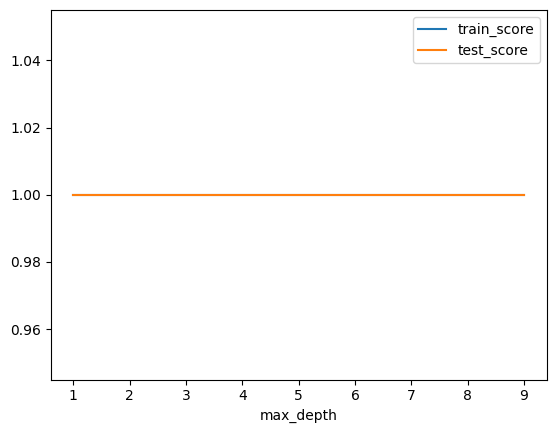

In [55]:
# Plot the results
models_df.plot()

In [ ]:
# Pick the depth value from the plot above
depth = 
clf = RandomForestClassifier(max_depth=depth)
clf.fit(X_train, y_train) 

train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

print('Random Forest Classifier')
print(f'Train score: {balanced_accuracy_score(y_train, train_pred)}')
print(f'Test Score: {balanced_accuracy_score(y_test, test_pred)}')

## Plots

In [ ]:
# Seaborn Plots
sns.set()
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [ ]:
# Histogram
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

In [ ]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

In [ ]:
# Combine Historgram and KDE
sns.distplot(data['x'])
sns.distplot(data['y']);

In [ ]:
# two-dimensional visualization of the data
sns.kdeplot(data);

In [ ]:
# joint distribution and the marginal distributions
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

In [ ]:
# hexagonally based histogram instead
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

# stuff below is extra old code

In [2]:
## Model and Fit to a Support Vector Machine

In [ ]:
# Create the support vector machine classifier model with a 'linear' kernel
svm_model = SVC(kernel='linear')

# Fit the model to the training data
svm_model.fit(X_train_encoded, y_train)

In [ ]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % svm_model.score(X_train_encoded, y_train))
print('Test Accuracy: %.3f' % svm_model.score(X_test_encoded, y_test))

In [ ]:
## Model and Fit to a KNN Model

In [ ]:
# Create the KNN model with 9 neighbors
knn_model = KNeighborsClassifier(n_neighbors=9)

# Fit the model to the training data
knn_model.fit(X_train_encoded, y_train)

In [ ]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % knn_model.score(X_train_encoded, y_train))
print('Test Accuracy: %.3f' % knn_model.score(X_test_encoded, y_test))

In [ ]:
## Model and Fit to a Decision Tree Classifier

In [ ]:
# Create the decision tree classifier model
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(X_train_encoded, y_train)

In [ ]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % dt_model.score(X_train_encoded, y_train))
print('Test Accuracy: %.3f' % dt_model.score(X_test_encoded, y_test))

In [ ]:
## Model and Fit to a Random Forest Classifier

In [ ]:
# Create the random forest classifier model
# with n_estimators=128 and random_state=1
rf_model = RandomForestClassifier(n_estimators=128, random_state=1)

# Fit the model to the training data
rf_model.fit(X_train_encoded, y_train)

In [ ]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % rf_model.score(X_train_encoded, y_train))
print('Test Accuracy: %.3f' % rf_model.score(X_test_encoded, y_test))

In [ ]:
# Show all models' scores
print("Logistic Regression Model")
print('Train Accuracy: %.3f' % lr_model.score(X_train_encoded, y_train))
print('Test Accuracy: %.3f' % lr_model.score(X_test_encoded, y_test))
print("----------------------------------")
print("Support Vector Machine Model")
print('Train Accuracy: %.3f' % svm_model.score(X_train_encoded, y_train))
print('Test Accuracy: %.3f' % svm_model.score(X_test_encoded, y_test))
print("----------------------------------")
print("K Nearest Neighbor Model")
print('Train Accuracy: %.3f' % knn_model.score(X_train_encoded, y_train))
print('Test Accuracy: %.3f' % knn_model.score(X_test_encoded, y_test))
print("----------------------------------")
print("Decision Tree Model")
print('Train Accuracy: %.3f' % dt_model.score(X_train_encoded, y_train))
print('Test Accuracy: %.3f' % dt_model.score(X_test_encoded, y_test))
print("----------------------------------")
print("Random Forrest Model")
print('Train Accuracy: %.3f' % rf_model.score(X_train_encoded, y_train))
print('Test Accuracy: %.3f' % rf_model.score(X_test_encoded, y_test))